### Review lecture, example 4:
Using Essentia (standard mode) to compute MFFCs

The review lecture targets warming up with simple audio signal processing tasks from previous semester. In the fourth example, we demonstrate MFCC computation using Essentia. This notebook does not have student version.

Essentia hands-on tutorial: http://essentia.upf.edu/documentation/essentia_python_tutorial.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import essentia.standard as ess
from IPython.display import Image#this is to embed image in the notebook

#Setting parameters
soundsDIR='sms-tools/sounds/'
file='flute-A4.wav'
M = 1024
N = 1024
H = 512
fs = 44100
#Reading wave in a single dimensional array
x = ess.MonoLoader(filename = soundsDIR+file, sampleRate = fs)()

Let's use the structure as explained in Essentia's documentation: http://essentia.upf.edu/documentation/howto_standard_extractor.html , except the last Aggregate component
<img src='http://essentia.upf.edu/documentation/_images/mfcc_extractor_halfsize.png'>

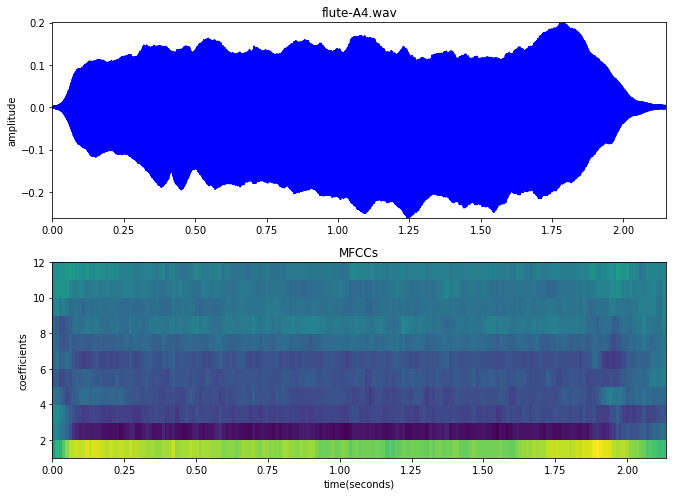

In [2]:
#Setting up Essentia functions to be used
spectrum = ess.Spectrum(size=N)# http://essentia.upf.edu/documentation/reference/std_Spectrum.html
window = ess.Windowing(size=M, type='hann')#http://essentia.upf.edu/documentation/reference/std_Windowing.html
mfcc = ess.MFCC(numberCoefficients = 12)#http://essentia.upf.edu/documentation/reference/std_MFCC.html

mfccs = []
for frame in ess.FrameGenerator(x, frameSize=M, hopSize=H, startFromZero=True):          
    mX = spectrum(window(frame))
    mfcc_bands, mfcc_coeffs = mfcc(mX)
    mfccs.append(mfcc_coeffs)            
mfccs = np.array(mfccs)

#Plotting the signal and the MFCCs
plt.figure(1, figsize=(9.5, 7))

plt.subplot(2,1,1)
plt.plot(np.arange(x.size)/float(fs), x, 'b')
plt.axis([0, x.size/float(fs), min(x), max(x)])
plt.ylabel('amplitude')
plt.title(file)

plt.subplot(2,1,2)
numFrames = int(mfccs[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)                                                    
plt.pcolormesh(frmTime, 1+np.arange(12), np.transpose(mfccs[:,1:]))
plt.ylabel('coefficients')
plt.xlabel('time(seconds)')
plt.title('MFCCs')
plt.autoscale(tight=True)
plt.tight_layout()
#If you like, you can save the figure in a file: plt.savefig('mfcc.png')
plt.show()